In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_colwidth', 150)

In [118]:
quora=pd.read_csv('data/quora-question-pairs/train.csv', index_col=0)#, nrows=10000)

Numbers
Dates
People
Organizations

In [7]:
from src.utils import get_entities, parallelize

In [120]:
parallelize(find_ents,quora.head(50),5)

KeyboardInterrupt: 

In [119]:
%%time
quora=find_ents(quora)

TypeError: 'float' object is not iterable

In [8]:
quora.is_duplicate.sum()

3711

In [9]:
from sentence_transformers import SentenceTransformer
model1 = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [67]:
from sklearn.metrics.pairwise import paired_cosine_distances, paired_euclidean_distances, paired_manhattan_distances

def get_similarities(df, model, columns=['question1','question2']):
    embeddings1 = model.encode(list(df[columns[0]].values), batch_size=16, 
                                       show_progress_bar=False, convert_to_numpy=True)
    embeddings2 = model.encode(list(df[columns[1]].values), batch_size=16, 
                                       show_progress_bar=False, convert_to_numpy=True)
    return 1 - (paired_cosine_distances(embeddings1, embeddings2))

In [12]:
%%time
quora['similarity']=get_similarities(quora, model1)

CPU times: user 13min 28s, sys: 8.77 s, total: 13min 37s
Wall time: 2min 16s


<AxesSubplot:ylabel='Frequency'>

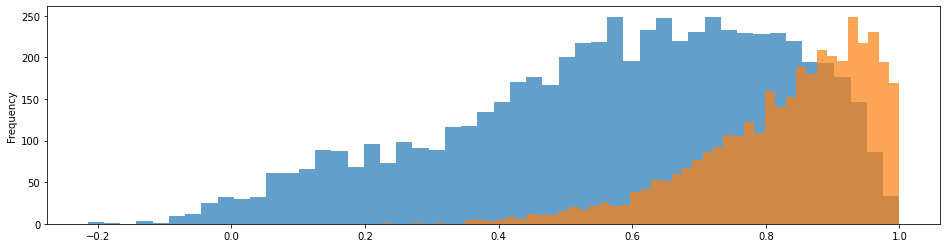

In [21]:
quora[quora.is_duplicate==0].similarity.plot.hist(bins=50,figsize=(16,4),alpha=0.7)
quora[quora.is_duplicate==1].similarity.plot.hist(bins=50,figsize=(16,4),alpha=0.7)

In [29]:
quora[(quora.is_duplicate==0)&(quora.similarity>0.96)].head(50)

,qid1,qid2,question1,question2,is_duplicate,similarity
id,,,,,,
41,83,84,When can I expect my Cognizant confirmation mail?,When can I expect Cognizant confirmation mail?,0,0.967385
298,596,597,On what online platforms can I post ads for beer money opportunity?,What online platforms can I post ads for beer money opportunity?,0,0.995172
328,655,656,What is journalism for you?,What is journalism?,0,0.961766
525,1048,1049,How can I treat a severe foot sprain?,How can I get a severe foot sprain?,0,0.974651
563,1124,1125,How would you destroy the world?,How can I destroy the world?,0,0.963545
585,1168,1169,Can you play Asian Playstation 4 games on a European Playstation?,Can you play Asian Playstation 4 games on a European Playstation 4?,0,0.989448
679,1355,1356,What is the essence of enlightenment?,What is enlightenment?,0,0.969232
867,1729,1730,How can constipation cause dizziness?,Can constipation cause dizziness?,0,0.983848
1107,2207,2208,How's life going?,How is your life going?,0,0.971955


In [87]:
quora[quora.q1_ent.apply(lambda x: len(x))>1]

,qid1,qid2,question1,question2,is_duplicate,similarity,q1_ent,q2_ent
id,,,,,,,,
9,19,20,Motorola (company): Can I hack my Charter Motorolla DCX3400?,How do I hack Motorola DCX3400 for free internet?,0,0.810972,"[{'text': 'Motorola', 'label': 'ORG'}, {'text': 'Motorolla DCX3400', 'label': 'PERSON'}]","[{'text': 'Motorola', 'label': 'ORG'}]"
14,29,30,"What are the laws to change your status from a student visa to a green card in the US, how do they compare to the immigration laws in Canada?",What are the laws to change your status from a student visa to a green card in the US? How do they compare to the immigration laws in Japan?,0,0.874693,"[{'text': 'US', 'label': 'GPE'}, {'text': 'Canada', 'label': 'GPE'}]","[{'text': 'US', 'label': 'GPE'}, {'text': 'Japan', 'label': 'GPE'}]"
18,37,38,Why are so many Quora users posting questions that are readily answered on Google?,Why do people ask Quora questions which can be answered easily by Google?,1,0.890718,"[{'text': 'Quora', 'label': 'PERSON'}, {'text': 'Google', 'label': 'ORG'}]","[{'text': 'Quora', 'label': 'PERSON'}, {'text': 'Google', 'label': 'ORG'}]"
23,47,48,How much is 30 kV in HP?,Where can I find a conversion chart for CC to horsepower?,0,0.489311,"[{'text': '30', 'label': 'CARDINAL'}, {'text': 'HP', 'label': 'GPE'}]",[]
33,67,68,"Does the United States government still blacklist (employment, etc.) some United States citizens because their political views?",How is the average speed of gas molecules determined?,0,0.083931,"[{'text': 'United States', 'label': 'GPE'}, {'text': 'United States', 'label': 'GPE'}]",[]
...,...,...,...,...,...,...,...,...
9985,19387,19388,Transsexuality: What would be some advantages to starting MtF HRT at age 21?,Who is a good anti-aging doctor in the greater Sydney area knowledgeable and helpful in HRT?,0,0.207576,"[{'text': 'MtF HRT', 'label': 'PRODUCT'}, {'text': 'age 21', 'label': 'DATE'}]","[{'text': 'Sydney', 'label': 'GPE'}, {'text': 'HRT', 'label': 'GPE'}]"
9990,19396,10565,Why does 500 and 1000 Rs notes banned by GOI and new notes of 500 and 2000 are issued?,What do you think of the decision by the Indian Government to replace 1000 notes with 2000 notes?,1,0.638210,"[{'text': '500', 'label': 'CARDINAL'}, {'text': 'GOI', 'label': 'ORG'}, {'text': '500', 'label': 'CARDINAL'}]","[{'text': 'the Indian Government', 'label': 'ORG'}, {'text': '1000', 'label': 'CARDINAL'}, {'text': '2000', 'label': 'CARDINAL'}]"
9994,19402,19403,What was it like flying first class in the 1990s?,What is it like flying first class?,0,0.818290,"[{'text': 'first', 'label': 'ORDINAL'}, {'text': 'the 1990s', 'label': 'DATE'}]",[]


In [32]:
%load_ext autoreload

In [50]:
%autoreload 2
from src.entity_actions import replace_list_ents, reduce_to_matching_ent_by_type

In [81]:
quora.head(50)

,qid1,qid2,question1,question2,is_duplicate,similarity,q1_ent,q2_ent
id,,,,,,,,
0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,0.776327,"[{'text': 'india', 'label': 'GPE'}]",[]
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,0.716990,"[{'text': 'Kohinoor', 'label': 'GPE'}]","[{'text': 'Indian', 'label': 'NORP'}]"
2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,0.701882,"[{'text': 'VPN', 'label': 'ORG'}]","[{'text': 'DNS', 'label': 'ORG'}]"
3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,0.144716,[],"[{'text': '24,23', 'label': 'CARDINAL'}]"
4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,0.410367,"[{'text': 'one', 'label': 'CARDINAL'}]",[]
5,11,12,Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?,"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?",1,0.808546,"[{'text': 'Sun Cap', 'label': 'PERSON'}]","[{'text': 'Capricorn', 'label': 'ORG'}, {'text': 'Sun', 'label': 'ORG'}, {'text': 'Moon', 'label': 'PERSON'}, {'text': 'Capricorn', 'label': 'GPE'}]"
6,13,14,Should I buy tiago?,What keeps childern active and far from phone and video games?,0,-0.082671,[],[]
7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1,0.937583,[],[]
8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0,0.373305,[],[]


In [77]:
quora_overlap=reduce_to_matching_ent_by_type(quora,'ORG',['company'])
quora_overlap=reduce_to_matching_ent_by_type(quora_overlap,'ORG',[''],mask_col_ending='_mask2')
quora_overlap=reduce_to_matching_ent_by_type(quora_overlap,'ORG',['IBM'],mask_col_ending='_mask3')
quora_overlap.head()

,qid1,qid2,question1,question2,is_duplicate,similarity,q1_ent,q2_ent,ent_overlap,question1_mask,question2_mask,question1_mask2,question2_mask2,question1_mask3,question2_mask3
id,,,,,,,,,,,,,,,
9,19,20,Motorola (company): Can I hack my Charter Motorolla DCX3400?,How do I hack Motorola DCX3400 for free internet?,0,0.810972,"[{'text': 'Motorola', 'label': 'ORG'}, {'text': 'Motorolla DCX3400', 'label': 'PERSON'}]","[{'text': 'Motorola', 'label': 'ORG'}]",[Motorola],company (company): Can I hack my Charter Motorolla DCX3400?,How do I hack company DCX3400 for free internet?,(company): Can I hack my Charter Motorolla DCX3400?,How do I hack DCX3400 for free internet?,IBM (company): Can I hack my Charter Motorolla DCX3400?,How do I hack IBM DCX3400 for free internet?
18,37,38,Why are so many Quora users posting questions that are readily answered on Google?,Why do people ask Quora questions which can be answered easily by Google?,1,0.890718,"[{'text': 'Quora', 'label': 'PERSON'}, {'text': 'Google', 'label': 'ORG'}]","[{'text': 'Quora', 'label': 'PERSON'}, {'text': 'Google', 'label': 'ORG'}]",[Google],Why are so many Quora users posting questions that are readily answered on company?,Why do people ask Quora questions which can be answered easily by company?,Why are so many Quora users posting questions that are readily answered on ?,Why do people ask Quora questions which can be answered easily by ?,Why are so many Quora users posting questions that are readily answered on IBM?,Why do people ask Quora questions which can be answered easily by IBM?
55,111,112,How difficult is it get into RSI?,Do you apply for programs like RSI when you're a rising senior?,0,0.406187,"[{'text': 'RSI', 'label': 'ORG'}]","[{'text': 'RSI', 'label': 'ORG'}]",[RSI],How difficult is it get into company?,Do you apply for programs like company when you're a rising senior?,How difficult is it get into ?,Do you apply for programs like when you're a rising senior?,How difficult is it get into IBM?,Do you apply for programs like IBM when you're a rising senior?
96,193,194,What was it like to attend Caltech with Jeremy Ehrhardt?,Who are some notable folks who attended Caltech?,0,0.514326,"[{'text': 'Caltech', 'label': 'ORG'}, {'text': 'Jeremy Ehrhardt', 'label': 'PERSON'}]","[{'text': 'Caltech', 'label': 'ORG'}]",[Caltech],What was it like to attend company with Jeremy Ehrhardt?,Who are some notable folks who attended company?,What was it like to attend with Jeremy Ehrhardt?,Who are some notable folks who attended ?,What was it like to attend IBM with Jeremy Ehrhardt?,Who are some notable folks who attended IBM?
99,199,200,Why is the number for Skype at 1-855-425-3768 always busy?,How could I get Skype to work on an android 4.1.1 phone?,0,0.532130,"[{'text': 'Skype', 'label': 'ORG'}, {'text': '1', 'label': 'CARDINAL'}]","[{'text': 'Skype', 'label': 'ORG'}, {'text': '4.1.1', 'label': 'CARDINAL'}]",[Skype],Why is the number for company at 1-855-425-3768 always busy?,How could I get company to work on an android 4.1.1 phone?,Why is the number for at 1-855-425-3768 always busy?,How could I get to work on an android 4.1.1 phone?,Why is the number for IBM at 1-855-425-3768 always busy?,How could I get IBM to work on an android 4.1.1 phone?


In [117]:
quora.head(2)

,qid1,qid2,question1,question2,is_duplicate,similarity,q1_ent,q2_ent
id,,,,,,,,
0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,0.776327,"[{'text': 'india', 'label': 'GPE'}]",[]
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,0.716990,"[{'text': 'Kohinoor', 'label': 'GPE'}]","[{'text': 'Indian', 'label': 'NORP'}]"


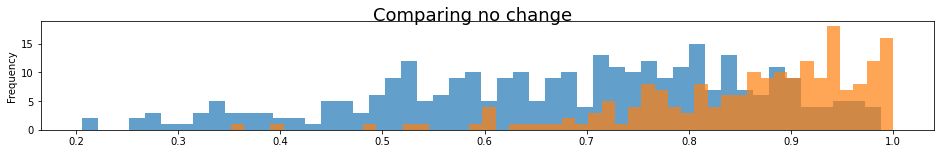

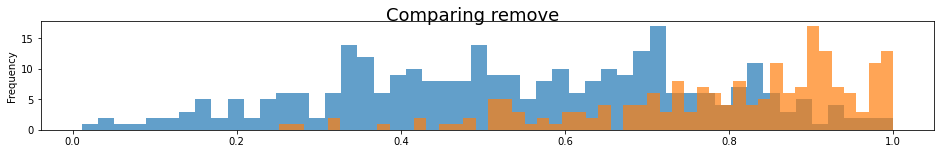

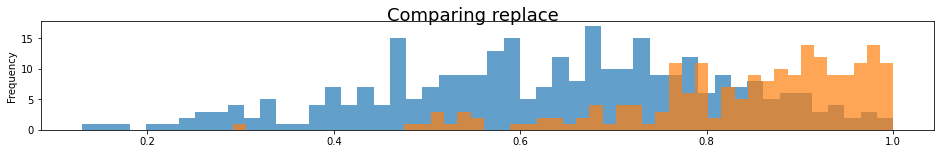

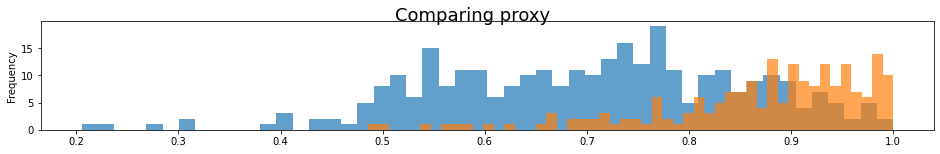

In [115]:
_ = compare_replacement_methods(quora,model1,experiments=experiments_org,ent_type='ORG')

In [70]:
%%time
quora_overlap['similarity_mask']=get_similarities(quora_overlap, 
                                                  model1, 
                                                  columns=['question1_mask','question2_mask'])

In [114]:
experiments_org={
    'no change':{'stand_in':None,'col_name':''},
    'remove':{'stand_in':[''],'col_name':'_remove'},
    'replace':{'stand_in':['company'],'col_name':'_replace'},
    'proxy':{'stand_in':['IBM'],'col_name':'_proxy'},
}

In [74]:
%%time
quora_overlap['similarity_mask2']=get_similarities(quora_overlap, 
                                                  model1, 
                                                  columns=['question1_mask2','question2_mask2'])

CPU times: user 33.4 s, sys: 474 ms, total: 33.9 s
Wall time: 5.66 s


In [78]:
%%time
quora_overlap['similarity_mask3']=get_similarities(quora_overlap, 
                                                  model1, 
                                                  columns=['question1_mask3','question2_mask3'])

CPU times: user 40.9 s, sys: 747 ms, total: 41.6 s
Wall time: 6.98 s


<AxesSubplot:title={'center':'hey'}, ylabel='Frequency'>

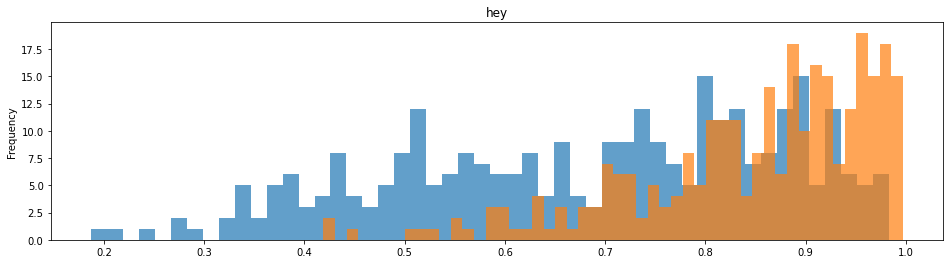

In [90]:
quora_overlap[quora_overlap.is_duplicate==0].similarity.plot.hist(bins=50,figsize=(16,4),alpha=0.7,title='hey')
quora_overlap[quora_overlap.is_duplicate==1].similarity.plot.hist(bins=50,figsize=(16,4),alpha=0.7)

<AxesSubplot:ylabel='Frequency'>

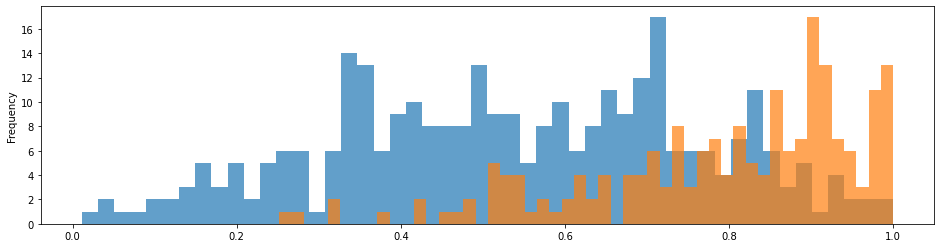

In [75]:
quora_overlap[quora_overlap.is_duplicate==0].similarity_mask2.plot.hist(bins=50,figsize=(16,4),alpha=0.7)
quora_overlap[quora_overlap.is_duplicate==1].similarity_mask2.plot.hist(bins=50,figsize=(16,4),alpha=0.7)

<AxesSubplot:ylabel='Frequency'>

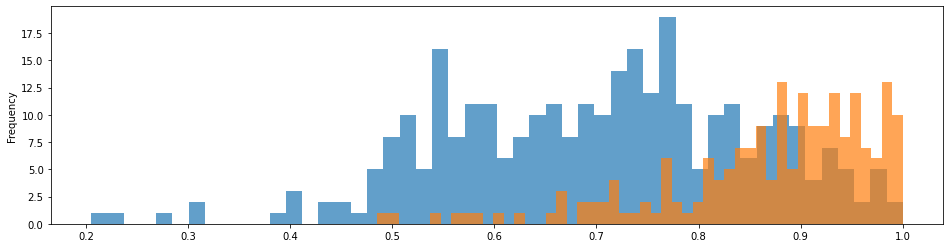

In [79]:
quora_overlap[quora_overlap.is_duplicate==0].similarity_mask3.plot.hist(bins=50,figsize=(16,4),alpha=0.7)
quora_overlap[quora_overlap.is_duplicate==1].similarity_mask3.plot.hist(bins=50,figsize=(16,4),alpha=0.7)

In [88]:
quora_overlap=reduce_to_matching_ent_by_type(quora,'GPE',['company'])
quora_overlap.shape

(592, 11)

In [89]:
quora_overlap.head(50)

,qid1,qid2,question1,question2,is_duplicate,similarity,q1_ent,q2_ent,ent_overlap,question1_mask,question2_mask
id,,,,,,,,,,,
14,29,30,"What are the laws to change your status from a student visa to a green card in the US, how do they compare to the immigration laws in Canada?",What are the laws to change your status from a student visa to a green card in the US? How do they compare to the immigration laws in Japan?,0,0.874693,"[{'text': 'US', 'label': 'GPE'}, {'text': 'Canada', 'label': 'GPE'}]","[{'text': 'US', 'label': 'GPE'}, {'text': 'Japan', 'label': 'GPE'}]",[US],"what are the laws to change your statcompany from a student visa to a green card in the company, how do they compare to the immigration laws in ca...",what are the laws to change your statcompany from a student visa to a green card in the company? how do they compare to the immigration laws in ja...
82,165,166,"If someone wants to open a commercial FM radio station in any city of India, how much does it cost and what is the procedure?","I want to make a travel commercial/clip video HD , For India and New Zealand. How much will it cost?",0,0.492391,"[{'text': 'India', 'label': 'GPE'}]","[{'text': 'India', 'label': 'GPE'}, {'text': 'New Zealand', 'label': 'GPE'}]",[India],"if someone wants to open a commercial fm radio station in any city of company, how much does it cost and what is the procedure?","i want to make a travel commercial/clip video hd , for company and new zealand. how much will it cost?"
86,173,174,"What were the major effects of the cambodia earthquake, and how do these effects compare to the Kamchatca earthquakes in 1952?","What were the major effects of the cambodia earthquake, and how do these effects compare to the Valparaiso earthquake in 1822?",1,0.697959,"[{'text': 'cambodia', 'label': 'GPE'}, {'text': 'Kamchatca', 'label': 'GPE'}, {'text': '1952', 'label': 'DATE'}]","[{'text': 'cambodia', 'label': 'GPE'}, {'text': 'Valparaiso', 'label': 'PRODUCT'}, {'text': '1822', 'label': 'DATE'}]",[cambodia],"what were the major effects of the company earthquake, and how do these effects compare to the kamchatca earthquakes in 1952?","what were the major effects of the company earthquake, and how do these effects compare to the valparaiso earthquake in 1822?"
100,201,202,Will there really be any war between India and Pakistan over the Uri attack? What will be its effects?,Will there be a nuclear war between India and Pakistan?,1,0.656961,"[{'text': 'India', 'label': 'GPE'}, {'text': 'Pakistan', 'label': 'GPE'}]","[{'text': 'India', 'label': 'GPE'}, {'text': 'Pakistan', 'label': 'GPE'}]","[India, Pakistan]",will there really be any war between company and company over the uri attack? what will be its effects?,will there be a nuclear war between company and company?
125,251,252,"Why does China block sanctions at the UN against the Jaish-e-Mohammad (JeM) chief, Masood Azhar?",Why does China support Masood Azhar?,1,0.631988,"[{'text': 'China', 'label': 'GPE'}, {'text': 'UN', 'label': 'ORG'}, {'text': 'Masood Azhar', 'label': 'PERSON'}]","[{'text': 'China', 'label': 'GPE'}, {'text': 'Masood Azhar', 'label': 'PERSON'}]",[China],"why does company block sanctions at the un against the jaish-e-mohammad (jem) chief, masood azhar?",why does company support masood azhar?
129,259,260,How do I access Torbox in India?,How do I access Google.com from India?,0,0.652743,"[{'text': 'Torbox', 'label': 'PERSON'}, {'text': 'India', 'label': 'GPE'}]","[{'text': 'Google.com', 'label': 'ORG'}, {'text': 'India', 'label': 'GPE'}]",[India],how do i access torbox in company?,how do i access google.com from company?
140,281,282,What is our stance against Pakistan?,What is the stance of Pakistan in the possession of weapons of mass destruction by North korea? Does it support DPRK or is it against DPRK?,0,0.555770,"[{'text': 'Pakistan', 'label': 'GPE'}]","[{'text': 'Pakistan', 'label': 'GPE'}, {'text': 'North korea', 'label': 'GPE'}, {'text': 'DPRK', 'label': 'ORG'}]",[Pakistan],what 

In [84]:
from spacy.lang.en.stop_words import STOP_WORDS

In [86]:
STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron